In [1]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import tensorflow
import keras

Using TensorFlow backend.


In [2]:
import os

In [3]:
#specifying the location of train and test set

dataset_folder = os.path.join('dataset')
train_folder = os.path.join(dataset_folder, 'train')
test_folder = os.path.join(dataset_folder, 'test')

In [4]:
#Finding the number of folders
print(len(os.listdir(train_folder)))
print(len(os.listdir(test_folder)))

2
2


In [70]:
"""
In order to split the dataset of images and labels, we have to change the image to numpy array
 
 X - numpy array of images 
 y - label of images
"""
import cv2 
import numpy as np

X_train = []
y_train = []

#For training
for folder in os.listdir(train_folder):
    for image in os.listdir(os.path.join(train_folder, folder)):
        img = cv2.imread(os.path.join(train_folder, folder, image))
        img = cv2.resize(img, (224,224))
        img = np.array(img, dtype='float32')
        X_train.append(img)
        y_train.append(folder)

In [71]:
X_test = []
y_test = []

#For testing
for folder in os.listdir(test_folder):
    for image in os.listdir(os.path.join(test_folder, folder)):
        img = cv2.imread(os.path.join(test_folder, folder, image))
        img = cv2.resize(img, (224,224))
        img = np.array(img, dtype='float32')
        X_test.append(img)
        y_test.append(folder)

In [72]:
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')

In [73]:
"""
Converting words to numbers

 cars - 0
 planes - 1
 
"""

y_train = [0 if x=='cars' else 1 for x in y_train]
y_test = [0 if x=='cars' else 1 for x in y_test]

In [74]:
y_train[0:5]

[0, 0, 0, 0, 0]

In [75]:
#reshaping y to 1d vectors
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [76]:
# from tensorflow.keras.utils import to_categorical

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test) 

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 224, 224, 3)
(100, 224, 224, 3)
(400, 1)
(100, 1)


In [13]:
#Importing tf libraries and functions

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D

In [14]:
"""
    Creating sequential model for CNN
"""

cnn_model = Sequential([
    
    #Using 64 filters with 3*3 shape
    Conv2D(64, (3,3), input_shape=(224,224,3), activation='relu'),
    MaxPooling2D((2,2), padding='same'),
    
    #Using 128 filters with 3*3 shape
    Conv2D(128, (3,3)),
    Activation('relu'),
    MaxPooling2D((2,2), padding='same'),
    
    #Using 512 filters with 3*3 shape
    Conv2D(512, (3,3)),
    Activation('relu'),
    MaxPooling2D((2,2), padding='same'),
    Dropout(0.2), #to avoid overfitting
    
    Flatten(), #convert to 1d vectors
    Dense(512, activation="relu"),
    Dropout(0.3), 
    Dense(1, activation="sigmoid") #2 classes
])

In [15]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.01)

cnn_model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [16]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
activation (Activation)      (None, 109, 109, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 512)       590336    
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 512)       0

In [17]:
"""
    Training the model with fit() method
    
"""
history = cnn_model.fit(
  X_train, y_train,
  validation_data=(X_test,y_test),
  epochs=10,
  verbose=1
)

Epoch 1/10
13/13 [==============================] - 77s 6s/step - loss: 885.4561 - accuracy: 0.5184 - val_loss: 2.9851 - val_accuracy: 0.7000
Epoch 2/10
13/13 [==============================] - 65s 5s/step - loss: 2.3507 - accuracy: 0.7696 - val_loss: 2.1593 - val_accuracy: 0.6900
Epoch 3/10
13/13 [==============================] - 67s 5s/step - loss: 0.7486 - accuracy: 0.8672 - val_loss: 0.5046 - val_accuracy: 0.8800
Epoch 4/10
13/13 [==============================] - 69s 5s/step - loss: 0.0942 - accuracy: 0.9707 - val_loss: 0.5654 - val_accuracy: 0.8500
Epoch 5/10
13/13 [==============================] - 69s 5s/step - loss: 0.0344 - accuracy: 0.9927 - val_loss: 0.7451 - val_accuracy: 0.8700
Epoch 6/10
13/13 [==============================] - 65s 5s/step - loss: 0.0262 - accuracy: 0.9910 - val_loss: 0.4719 - val_accuracy: 0.8900
Epoch 7/10
13/13 [==============================] - 65s 5s/step - loss: 0.0058 - accuracy: 0.9974 - val_loss: 0.6160 - val_accuracy: 0.9000
Epoch 8/10
13/13 [

## Notes:
- training accuracy is at max whereas validation accuracy is not increasing
- model is overfitting the train set
- more variety of images should be availabe and trained for better validation accuracy

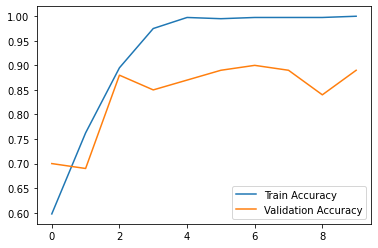

In [23]:
import matplotlib.pyplot as plt

#Plotting train accuracy and validation accuracy

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

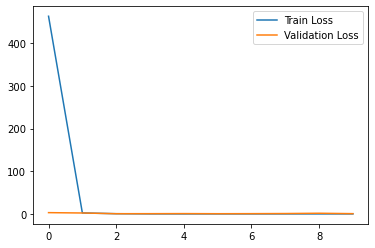

In [24]:
#Plotting train loss and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [25]:
#Predicting the X_test

y_pred = cnn_model.predict(X_test)

In [33]:
"""
    Since y_pred is continuous value, it must be converted to discrete value for comparision with test set
"""

y_pred_list = y_pred.tolist()
y_pred_list[0:5]

[[0.009035706520080566],
 [1.5836440070415847e-07],
 [0.9970298409461975],
 [7.172764213689303e-30],
 [1.5517729480052367e-05]]

In [37]:
#converting continuous to discrete value

final_pred = [[0] if pred[0]<0.5 else [1] for pred in y_pred_list]        

In [38]:
#Converting list to array

final_pred = np.array(final_pred)

In [45]:
#Importing metrics for comparision
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

In [46]:
#creating confusion matrix for evaluation of model
cm = confusion_matrix(y_test, final_pred)

Text(0.5, 1.0, 'Confusion matrix')

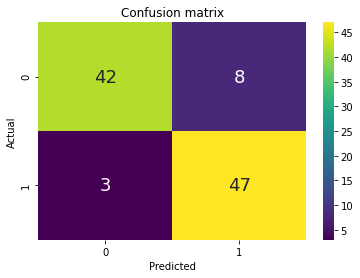

In [53]:
sns.heatmap(cm, annot=True, cmap='viridis', annot_kws={"fontsize":18})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion matrix")

## Notes
- Here 0 means Car and 1 means Plane
- So, Model predicted car as car 42 times
- Model predicted plane as plane 47 times
- Model predicted car as plane 8 times
- Model predicted plane as car 3 times

In [54]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        50
           1       0.85      0.94      0.90        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [57]:
print("F1-score is",f1_score(y_test, final_pred))

F1-score is 0.8952380952380952


Text(0.5, 1.0, 'Plane')

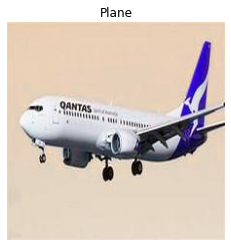

In [104]:
"""
    Lets test the prediction in actual images
"""

import cv2, random

random_test_image = os.path.join(test_folder, "planes","25.jpg")

img = cv2.imread(random_test_car_image)
plt.imshow(img)
plt.axis('off')

predictions = cnn_model.predict(img.reshape(-1, 224,224,3)) #predict the image

if predictions[0][0]<0.5:
    title = "Car"
else:
    title = "Plane"
plt.title(title)

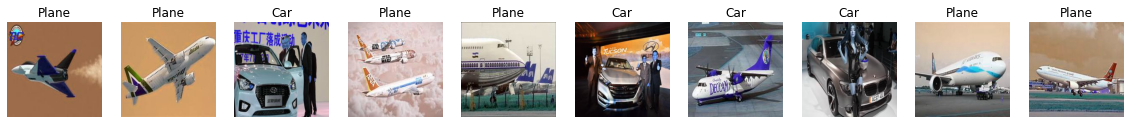

In [107]:
"""
Prediction for 10 random images
"""

fig, ax = plt.subplots(1,10,figsize=(20,20)) #1 row and 10 columns
plt.axis("off")
total_test_images = []
car_test_images = [os.path.join(test_folder, 'cars',img) for img in os.listdir(os.path.join(test_folder, "cars"))]
plane_test_images = [os.path.join(test_folder, 'planes',img) for img in os.listdir(os.path.join(test_folder, "planes"))]
total_test_images.extend(car_test_images)
total_test_images.extend(plane_test_images)

for i in range(10):
    image = random.choice(total_test_images) #selecting random images
    image = cv2.imread(image)
    predictions = cnn_model.predict(image.reshape(-1, 224,224,3)) #predicting the image
    
    if predictions[0][0]<0.5:
        title = "Car"
    else:
        title = "Plane"

    ax[i].imshow(image)
    ax[i].title.set_text(title)
    ax[i].axis("off")

fig.show()